Disciplina: **Mineração de Dados**

Professor: **Wilson Castello Branco Neto**

Aula 11 - Agrupamento

Nome: Wilson Castello Branco Neto

Exemplo 3: Agrupamento hierárquico

Cria e apresenta um dataframe com cinco registros. Seus atributos são as posições de cada ponto nos eixos X e Y.

In [ ]:
import pandas as pd

df = pd.DataFrame([[1.5, 1,'A'], [2.25, 2.25,'B'], [1.25, 1.5,'C'],[3, 3,'D'], [3.5, 3.5,'E']], columns=['X', 'Y','ID'])
df = df.set_index('ID')
print(df)

       X     Y
ID            
A   1.50  1.00
B   2.25  2.25
C   1.25  1.50
D   3.00  3.00
E   3.50  3.50


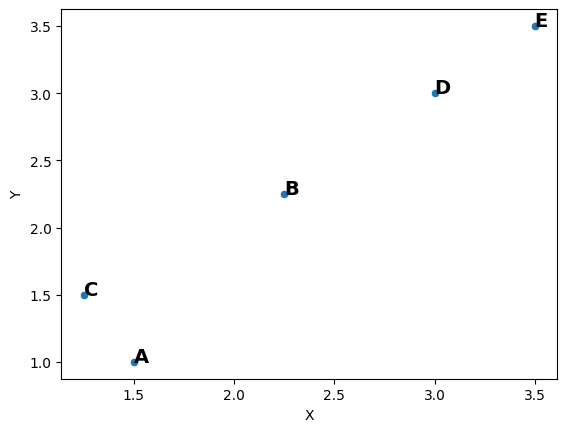

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.scatterplot(data=df, x='X', y='Y')
for i in range(0,df.shape[0]):
    g.text(df['X'].iloc[i], df['Y'].iloc[i], df.index[i], fontsize=14, weight='bold')
plt.show()

Cria um dendrograma usando o método de single-linkage (distância mínima) para visualização dos dados e estimação da quantidade de clusters necessárias.

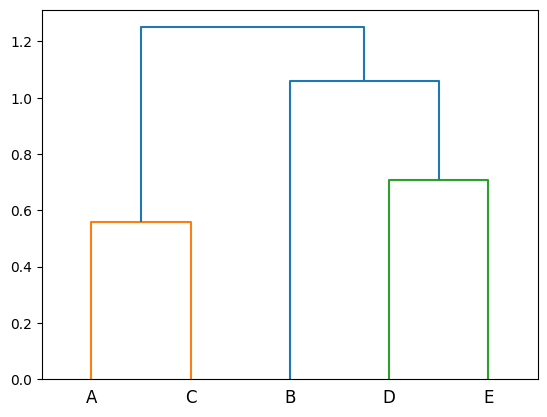

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, complete, average

dendrograma = linkage(df)
grafico = dendrogram(dendrograma, labels=df.index)
plt.show()

Cria um novo atributo no dataframe, denominado grupoAgSing que recebe o resultado do algoritmo de cluster hierárquico usando o método single-linkage. Em seguida, apresenta o diagrama de dispersão com os pontos coloridos de acordo com o resultado de cada agrupamento.

       X     Y GrupoAgSing
ID                        
A   1.50  1.00           1
B   2.25  2.25           0
C   1.25  1.50           1
D   3.00  3.00           0
E   3.50  3.50           0


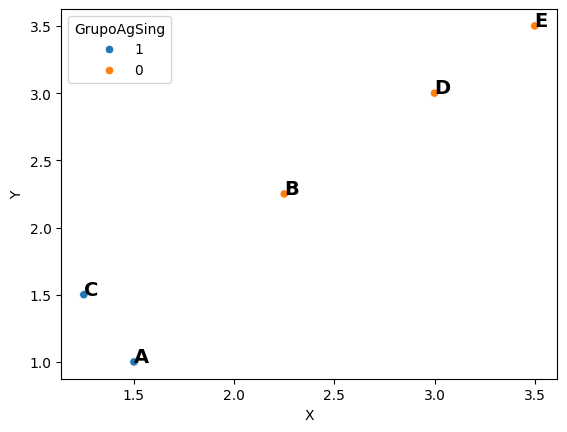

In [ ]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering(n_clusters=2,linkage='single')
modelo.fit(df)

df['GrupoAgSing'] = modelo.labels_
df['GrupoAgSing'] = df['GrupoAgSing'].astype(str)

print(df)

g = sns.scatterplot(data=df, x='X', y='Y', hue='GrupoAgSing')
for i in range(0,df.shape[0]):
  g.text(df['X'].iloc[i], df['Y'].iloc[i], df.index[i], fontsize=14, weight='bold')
plt.show()

Cria um dendrograma usando o método complete-linkage (distância máxima) para agrupamento dos clusters.

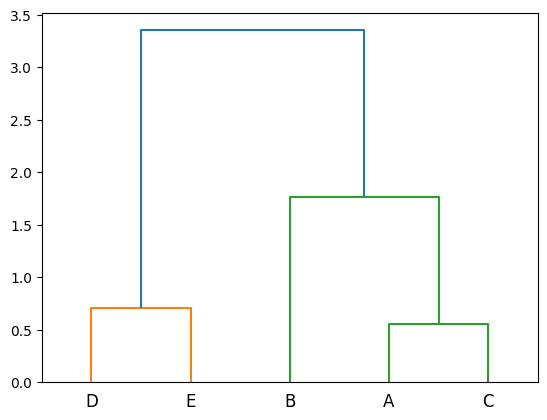

In [ ]:
dendrograma = complete(df)
grafico = dendrogram(dendrograma, labels=df.index)
plt.show()

Cria um novo atributo no dataframe, denominado grupoAgComp que recebe o resultado do algoritmo de cluster hierárquico usando o método complete-linkage. Em seguida, apresenta o diagrama de dispersão com os pontos coloridos de acordo com o resultado de cada agrupamento.

       X     Y GrupoAgSing GrupoAgComp
ID                                    
A   1.50  1.00           1           0
B   2.25  2.25           0           0
C   1.25  1.50           1           0
D   3.00  3.00           0           1
E   3.50  3.50           0           1


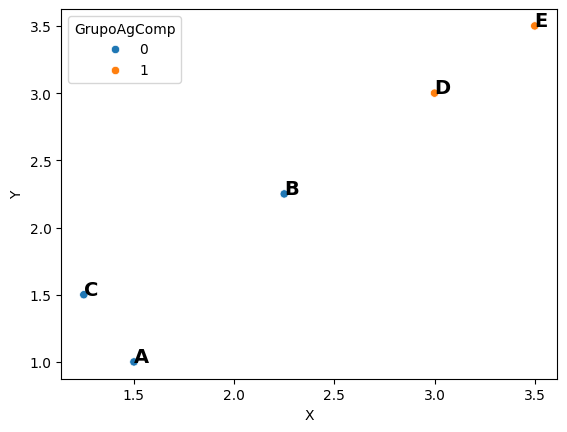

In [ ]:
modelo = AgglomerativeClustering(n_clusters=2,linkage='complete')
modelo.fit(df)

df['GrupoAgComp'] = modelo.labels_
df['GrupoAgComp'] = df['GrupoAgComp'].astype(str)

print(df)

g = sns.scatterplot(data=df, x='X', y='Y', hue='GrupoAgComp')
for i in range(0,df.shape[0]):
  g.text(df['X'].iloc[i], df['Y'].iloc[i], df.index[i], fontsize=14, weight='bold')
plt.show()

Para problemas em que os dados podem ser agrupados em grupos esféricos, os resultados do K-means e do Agrupamento Aglomerativo são bastante semelhantes.


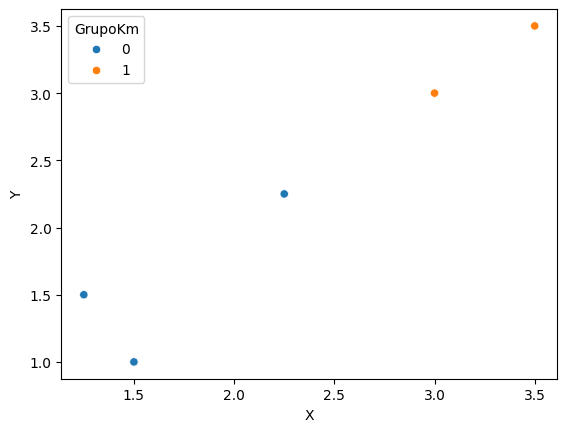

In [ ]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=2, random_state=0, n_init=5)
modelo.fit(df)

df['GrupoKm'] = modelo.labels_
df['GrupoKm'] = df['GrupoKm'].astype(str)
sns.scatterplot(data=df, x='X', y='Y', hue='GrupoKm')
plt.show()

Entretanto, em problemas com dados agrupados em formatos diferentes, o agrupamento hierárquico é capaz de obter resultados melhores.

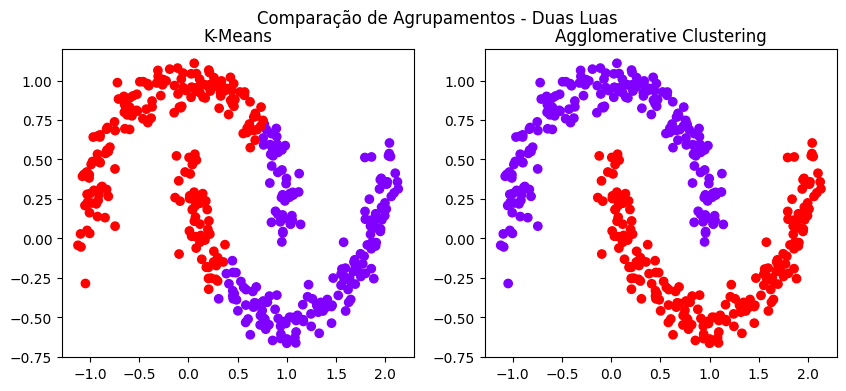

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=400, noise=0.08, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

hier = AgglomerativeClustering(n_clusters=2, linkage='single')
hier.fit_predict(X)
labels_hier = hier.labels_


fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='rainbow')
axs[0].set_title("K-Means")

axs[1].scatter(X[:, 0], X[:, 1], c=labels_hier, cmap='rainbow')
axs[1].set_title("Agglomerative Clustering")

plt.suptitle("Comparação de Agrupamentos - Duas Luas")
plt.show()